In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# VISUALIZACION 1 - HEATMAP


In [3]:
estaciones2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DengAI/dengue_features_train.csv")
presion_hum = estaciones2[['year','weekofyear','reanalysis_relative_humidity_percent','station_precip_mm']]
presion_hum['periodo']=list(zip(presion_hum.year,presion_hum.weekofyear))

#Me quedo solo con los datos que quiero y filtro donde no tengo datos.
presion_hum = presion_hum[['periodo','reanalysis_relative_humidity_percent','station_precip_mm']]
presion_hum = presion_hum.query('reanalysis_relative_humidity_percent.notnull() and station_precip_mm.notnull()')


<ipython-input-3-06e89ba041a8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  presion_hum['periodo']=list(zip(presion_hum.year,presion_hum.weekofyear))


In [4]:
def categorizar_pres (presipitaciones):
  presipitaciones = float(presipitaciones)
  categoria = 0
  if (presipitaciones > 0):
    categoria = int(presipitaciones / 50)
  return str(categoria*50) + " - " + str((categoria + 1) *50)

def categorizar_hum (humedad):
  humedad = float(humedad)
  categoria = int(humedad / 10)
  return str(categoria*10) + " - " + str((categoria + 1) *10)

presion_hum.loc[:,'reanalysis_relative_humidity_percent'] = [categorizar_hum(x) for x in presion_hum.reanalysis_relative_humidity_percent]
presion_hum.loc[:,'station_precip_mm'] = [categorizar_pres(x) for x in presion_hum.station_precip_mm]

In [5]:
casos= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DengAI/dengue_labels_train.csv")
casos['periodo']=list(zip(casos.year,casos.weekofyear))
casos = casos[['periodo','total_cases']]


Merge para tener todos los datos en el mismo lugar

In [6]:
grafico = casos.merge(presion_hum,on='periodo')
grafico = grafico[['total_cases','reanalysis_relative_humidity_percent','station_precip_mm']]
grafico = grafico.groupby(['reanalysis_relative_humidity_percent','station_precip_mm']).agg({'total_cases': 'sum'})
grafico = grafico.reset_index()

Hago pivot para tener los datos como los necesito y reordeno columnas.

In [7]:
grafico = grafico.pivot("reanalysis_relative_humidity_percent", "station_precip_mm", "total_cases")
grafico = grafico.fillna(0)
grafico.reset_index()
grafico = grafico[["0 - 50", '50 - 100',"100 - 150", "150 - 200","200 - 250","250 - 300","300 - 350",'350 - 400','500 - 550']]


<ipython-input-7-2cd65c3ec6cb>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  grafico = grafico.pivot("reanalysis_relative_humidity_percent", "station_precip_mm", "total_cases")


Text(0.5, 1.0, 'Casos Totales Registrados')

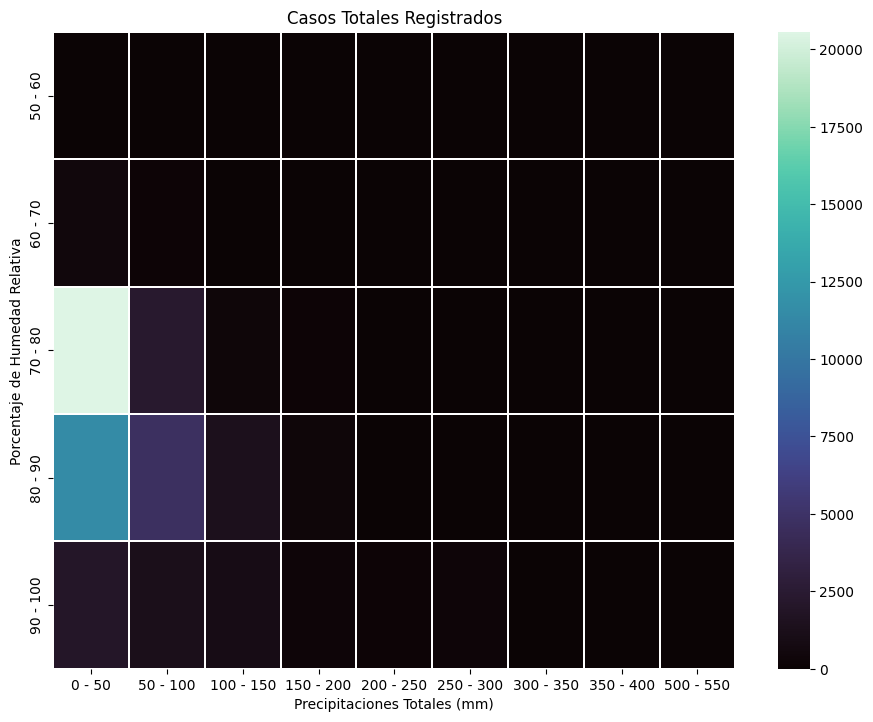

In [8]:
from matplotlib import pyplot

a4_dims = (11, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

import matplotlib.pyplot as plt
sns.heatmap(grafico,linewidth=.3, cmap="mako").set(xlabel='Precipitaciones Totales (mm)', ylabel='Porcentaje de Humedad Relativa')

plt.title('Casos Totales Registrados')


# VISUALIZACION 2 - HISTOGRAMA

<ipython-input-9-403a60b30c4d>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  grafico.set_xticklabels(grafico.get_xticklabels(), rotation= 85, ha = 'center')


Text(0.5, 1.0, 'Casos Totales Registrados en Base a la Temperatura Minima Semanal')

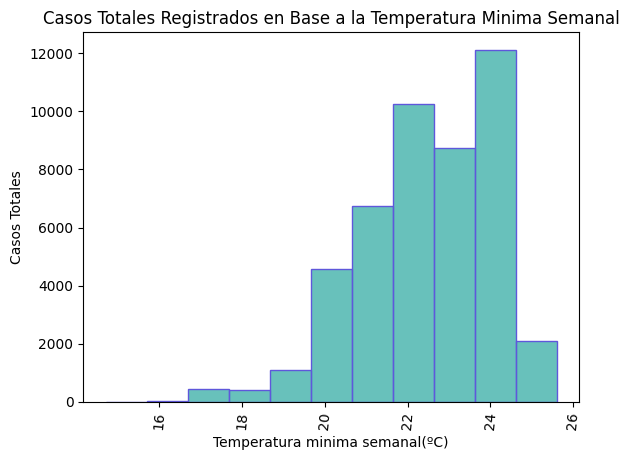

In [9]:
temperatura = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DengAI/dengue_features_train.csv")
temperatura = temperatura[['year','weekofyear','station_min_temp_c']]

#Filtro las filas que no tienen informacion suficiente.
temperatura = temperatura.query('station_min_temp_c.notnull()')
temperatura['periodo']=list(zip(temperatura.year,temperatura.weekofyear))


casos= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DengAI/dengue_labels_train.csv")
casos['periodo']=list(zip(casos.year,casos.weekofyear))
casos = casos[['periodo','total_cases']]

#Junto los datos que necesito
casos_temp = casos.merge(temperatura,on='periodo')

#Grafico
grafico = sns.histplot(data=casos_temp, x= "station_min_temp_c", bins = 11, weights = "total_cases",edgecolor = sns.color_palette("hls")[4],
color= sns.color_palette("husl")[3])
grafico.set(xlabel='Temperatura minima semanal(ºC)', ylabel='Casos Totales')
grafico.set_xticklabels(grafico.get_xticklabels(), rotation= 85, ha = 'center')
plt.title('Casos Totales Registrados en Base a la Temperatura Minima Semanal')

# Visualizacion 3 - Boxplot

In [10]:
def city(x):
  if str(x).lower() == 'sj': return 'San Juan'
  return 'Iquitos'

[Text(0.5, 0, 'Casos Totales'), Text(0, 0.5, 'Ciudad')]

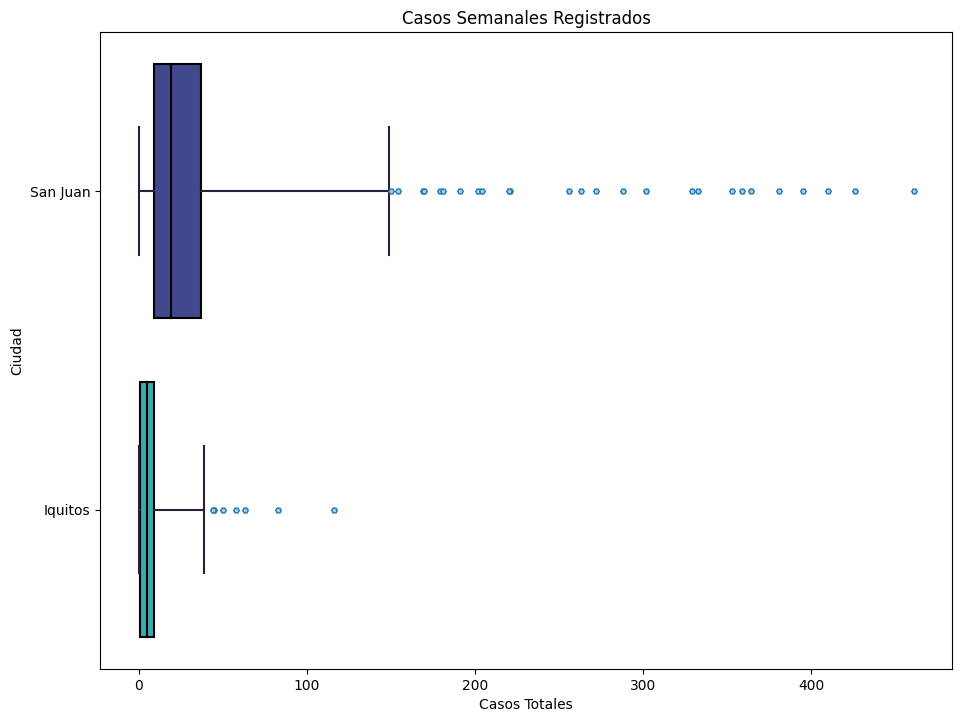

In [11]:
from matplotlib import pyplot
#Redimenciono grafico
a4_dims = (11, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

#Me quedo con la info que necesito y reescribo las ciudades para mejor comprension
casos= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DengAI/dengue_labels_train.csv")
casos.loc[:,'city'] = [city(x) for x in casos.city]

#Grafico
PROPS = {
    'boxprops':{'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color': sns.color_palette("mako")[0]},
    'capprops':{'color': sns.color_palette("mako")[0]}}

flierprops = dict(markerfacecolor=sns.color_palette("Paired")[0],  markeredgecolor= sns.color_palette("Paired")[1],marker='H')

grafico = sns.boxplot(data=casos, x='total_cases',y ='city', palette="mako", fliersize = 4, whis = 4, saturation= 10, **PROPS, flierprops=flierprops )
plt.title('Casos Semanales Registrados')
grafico.set(xlabel='Casos Totales', ylabel='Ciudad')